In [6]:
import torch
import torch.nn as nn


class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc = nn.Linear(10, 2)   # 10 input features → 2 outputs (classes)

    def forward(self, x):
        return self.fc(x)  # raw outputs (logits)

y_pred = SimpleNet()         


In [7]:
import torch
import torch.nn as nn

# 1. Define the loss function
criterion = nn.CrossEntropyLoss()

# 2. Example predictions (logits)
# batch size = 3, num_classes = 4
outputs = torch.tensor([[2.0, 1.0, 0.1, -1.0],
                        [0.5, 2.5, 0.3, -0.5],
                        [1.2, 0.8, 2.5, 0.0]])

# 3. True labels (class indices, NOT one-hot)
labels = torch.tensor([0, 1, 2])  # correct classes for each sample

# 4. Compute loss
loss = criterion(outputs, labels)
print(loss.item())


0.3795219659805298


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Dummy dataset (binary classification: 2 classes)
X = torch.randn(100, 10)   # 100 samples, 10 features
y = torch.randint(0, 2, (100,))  # labels: 0 or 1

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Simple model
class SimpleClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

model = SimpleClassifier(input_dim=10, hidden_dim=32, output_dim=2)

# Loss function & Optimizer
criterion = nn.CrossEntropyLoss()   # good for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(5):  # 5 epochs
    for batch_X, batch_y in loader:
        
        # 1. Forward pass
        outputs = model(batch_X)
        
        # 2. Compute loss
        loss = criterion(outputs, batch_y)
        
        # 3. Backward pass
        optimizer.zero_grad()   # reset gradients
        loss.backward()         # compute gradients
        
        # 4. Optimizer step
        optimizer.step()        # update weights
    
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.7070
Epoch 2, Loss: 0.8412
Epoch 3, Loss: 0.6733
Epoch 4, Loss: 0.6946
Epoch 5, Loss: 0.7124


In [15]:
criterion = nn.CrossEntropyLoss()

# Try one optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# OR swap:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.6631
Epoch 2, Loss: 0.6630
Epoch 3, Loss: 0.6629
Epoch 4, Loss: 0.6626
Epoch 5, Loss: 0.6623
Epoch 6, Loss: 0.6620
Epoch 7, Loss: 0.6615
Epoch 8, Loss: 0.6611
Epoch 9, Loss: 0.6606
Epoch 10, Loss: 0.6600
Epoch 11, Loss: 0.6595
Epoch 12, Loss: 0.6589
Epoch 13, Loss: 0.6583
Epoch 14, Loss: 0.6576
Epoch 15, Loss: 0.6570
Epoch 16, Loss: 0.6563
Epoch 17, Loss: 0.6556
Epoch 18, Loss: 0.6549
Epoch 19, Loss: 0.6542
Epoch 20, Loss: 0.6535


In [16]:
 
# OR swap:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.6528
Epoch 2, Loss: 0.6517
Epoch 3, Loss: 0.6505
Epoch 4, Loss: 0.6494
Epoch 5, Loss: 0.6483
Epoch 6, Loss: 0.6471
Epoch 7, Loss: 0.6460
Epoch 8, Loss: 0.6449
Epoch 9, Loss: 0.6438
Epoch 10, Loss: 0.6427
Epoch 11, Loss: 0.6416
Epoch 12, Loss: 0.6406
Epoch 13, Loss: 0.6395
Epoch 14, Loss: 0.6384
Epoch 15, Loss: 0.6373
Epoch 16, Loss: 0.6363
Epoch 17, Loss: 0.6352
Epoch 18, Loss: 0.6341
Epoch 19, Loss: 0.6330
Epoch 20, Loss: 0.6319


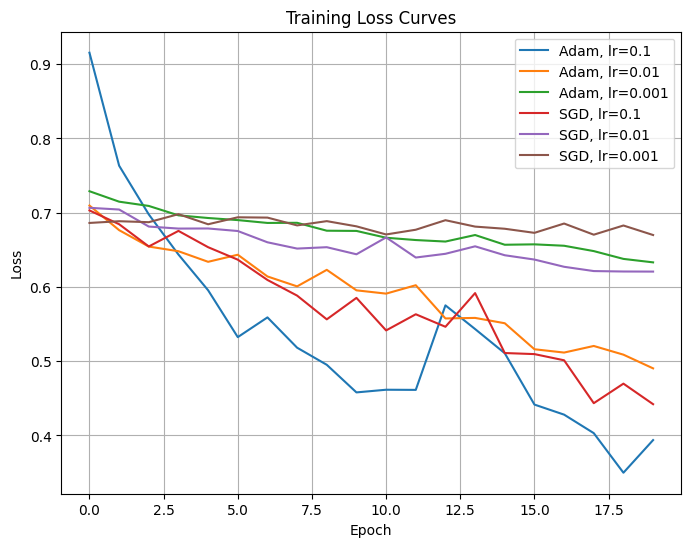

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


# Dataset
X = torch.randn(200, 10)         # 200 samples, 10 features
y = torch.randint(0, 2, (200,))  # labels: 0 or 1

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 2)  # output_dim = 2 classes

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))



#  Training Function

def train_model(optimizer_name="Adam", lr=0.001, num_epochs=20):
    model = Net()
    criterion = nn.CrossEntropyLoss()

    # Choose optimizer
    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    else:
        raise ValueError("Unknown optimizer")

    losses = []
    for epoch in range(num_epochs):
        total_loss = 0
        for batch_X, batch_y in dataloader:
            logits = model(batch_X)              # Forward
            loss = criterion(logits, batch_y)    # Loss

            loss.backward()                      # Backward
            optimizer.step()                     # Update params
            optimizer.zero_grad()                # Reset grads

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        losses.append(avg_loss)

    return losses



results = {}
for opt in ["Adam", "SGD"]:
    for lr in [0.1, 0.01, 0.001]:
        label = f"{opt}, lr={lr}"
        results[label] = train_model(opt, lr)

# -----------------------------
# 5. Plot Results
# -----------------------------
plt.figure(figsize=(8,6))
for label, losses in results.items():
    plt.plot(losses, label=label)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curves")
plt.legend()
plt.grid(True)
plt.show()
